# Data science workers profile

1. Question_1 (P1) = Age? [Masquerade] 
2. Question_2 (P2) = Gender? [Masquerade]
3. Question_3 (P3) = You live in Brasil curently? 
5. Question_5 (P5) = In which brasilian state do you live curently? [Masquerade]
6. Question_6 (P6) = Is this your born state (Where you were born or graduated)? **See if people move to work**
8. Question_8 (P8) = What's your knowledge level? 
10. Question_10 (P10) = What's your curently job situation? 
12. Question_12 (P12) = How many workers does your company have curently? 
13. Question_13 (P13) = Are you a manager? 
16. Question_16 (P16) = How much is your salary? [Masquerade]
17. Question_17 (P17) = How many years of experience you have on DS field?
18. Question_18 (P18) = How many years of experience you have on IT/Software engineering you had before you start on DS field? 
19. Question_19 (P19) = You consider yourself a DS worker? **For those who say no see if they use the tools DS use**
20. Question_20 (P20) = Quais dos métodos listados abaixo você costuma utilizar no trabalho?
21. Question_21 (P21) = Which of those programming languages you use at work?
22. Question_22 (P22) = From those which is the programming language you use the most at work? [Masquerade]
23. Question_23 (P23) = Quais das fontes de dados listadas você já analisou no trabalho?
24. Question_24 (P24) = Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo? Selecione no máximo duas opções que você mais utiliza. **Delete**
25. Question_25 (P25) = Quais das opções de Cloud listadas abaixo você utiliza no trabalho?
26. Question_26 (P26) = Quais dos bancos de dados/fontes de dados listados abaixo você utiliza para consultar informações, e posteriormente analisar, no trabalho?
27. Question_27 (P27) = Quais as Ferramentas de Business Intelligence você utiliza no trabalho?
28. Question_28 (P28) = Quais as tecnologias são utilizadas como ferramenta de ETL no seu trabalho?
29. Question_29 (P29) = Sua organização possui um Data Warehouse? **Delete**
30. Question_30 (P30) = Qual tecnologia utilizada como plataforma do Data Warehouse?
31. Question_31 (P31) = Quais das iniciativas do Data Hackers que você já acessou/acompanhou? **Delete**
32. Question_32 (P32) = Entre as iniciativas do Data Hackers qual a sua preferida? **Delete**
33. Question_33 (P33) = De quais outras formas que você costuma se atualizar no mundo dos dados?
34. Question_34 (P34) = Em quais dessas plataformas listadas abaixo você já iniciou/completou cursos na área de Data Science?
35. Question_35 (P35) = Dentre as plataformas listadas abaixo qual foi a sua preferida para cursos de Data Science? **Delete**
36. Question_36 (P36) = Você deseja participar do sorteio? **Delete**

Além dessas, derivamos algumas outras colunas:
1. Derivado_1 (D1) = Macrorregião em que mora
2. Derivado_2 (D2) = Macrorregião em que nasceu
3. Derivado_3 (D3) = Área de formação anonimizada
4. Derivado_4 (D4) = Setor de mercado anonimizado
5. Derivado_5 (D5) = Nível de gerência anonimizado
6. Derivado_6 (D6) = Cargo anonimizada

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Models
from sklearn.ensemble import RandomForestRegressor
#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

df= pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Datasets/master/PesquisaDH/datahackers-survey-2019-anonymous-responses.csv')

In [137]:
pd.set_option("display.max_columns", 200) #See all columns
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')","('P21', 'java')","('P21', 'julia')","('P21', 'sas_stata')","('P21', 'visual_basic_vba')","('P21', 'scala')","('P21', 'matlab')","('P21', 'php')","('P21', 'no_listed_languages')","('P22', 'most_used_proggraming_languages')","('P23', 'sql')","('P23', 'nosql')","('P23', 'images')","('P23', 'nlp')","('P23', 'videos')","('P23', 'sheets')","('P23', 'other')","('P24', 'sql')","('P24', 'nosql')","('P24', 'imagens')","('P24', 'nlp')","('P24', 'vídeos')","('P24', 'planilhas')","('P24', 'other')","('P25', 'aws')","('P25', 'gcp')","('P25', 'azure')","('P25', 'ibm')","('P25', 'on_premise_servers')","('P25', 'cloud_própria')","('P25', 'other')","('P26', 'mysql')","('P26', 'oracle')","('P26', 'sql_server')","('P26', 'aurora')","('P26', 'dynamodb')","('P26', 'coachdb')","('P26', 'cassandra')","('P26', 'mongodb')","('P26', 'mariadb')","('P26', 'datomic')","('P26', 's3')","('P26', 'postgresql')","('P26', 'elaticsearch')","('P26', 'db2')","('P26', 'ms_access')","('P26', 'sqlite')","('P26', 'sybase')","('P26', 'firebase')","('P26', 'vertica')","('P26', 'redis')","('P26', 'neo4j')","('P26', 'google_bigtable')","('P26', 'hbase')","('P26', 'other')","('P27', 'microsoft_powerbi')","('P27', 'qlik_view_qlik_sense')","('P27', 'tableau')","('P27', 'metabase')","('P27', 'superset')","('P27', 'redash')","('P27', 'microstrategy')","('P27', 'ibm_analytics_cognos')","('P27', 'sap_business_objects')","('P27', 'oracle_business_intelligence')","('P27', 'birst')","('P27', 'looker')","('P27', 'google_data_studio')","('P27', 'only_excel_gsheets')","('P27', 'no_bi_tool_at_work')","('P27', 'other')","('P28', 'sql_&_stored_procedures')","('P28', 'apache_airflow')","('P28', 'luigi')","('P28', 'aws_glue')","('P28', 'talend')","('P28', 'pentaho')","('P28', 'alteryx')","('P28', 'oracle_data_integrator')","('P28', 'ibm_data_stage')","('P28', 'sap_bw_etl')","('P28', 'siss_sql_server_integration_services')","('P28', 'other')","('P29', 'have_data_warehouse')","('P30', 'google_bigquery')","('P30', 'aws_redshift')","('P30', 'snowflake')","('P30', 'oracle')","('P30', 'postgres_mysql')","('P30', 'ibm')","('P30', 'teradata')","('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'd

In [138]:
#Drop columns I won't use
df.drop(columns= ["('P0', 'id')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')",
                  "('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')",
                  "('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')", 
                  "('P36', 'draw_participation')", "('P35', 'data_science_plataforms_preference')", 
                 "('P35', 'other')"],inplace= True)

In [139]:
#Find missing data
df.isnull().sum()[df.isnull().sum() != 0 ].sort_values(ascending = False)

('D5', 'anonymized_manager_level')            1460
('D2', 'origin_macroregion')                  1440
('P29', 'have_data_warehouse')                 972
('P22', 'most_used_proggraming_languages')     859
('D6', 'anonymized_role')                      514
('P5', 'living_state')                         337
('D1', 'living_macroregion')                   337
('D4', 'anonymized_market_sector')             243
('P12', 'workers_number')                      238
('P13', 'manager')                             238
('P16', 'salary_range')                        238
('D3', 'anonymized_degree_area')                35
('P6', 'born_or_graduated')                     34
('P1', 'age')                                   24
('P2', 'gender')                                 3
dtype: int64

From the missing data we see that probably most of the people are not in manager level positions, the most used languages (P22) can be taken from P21, the rest even if we don't use in the model we can use to understand the data workers profile

In [140]:
#Dropping columns with a lot of missing data
df.drop(columns= ["('D5', 'anonymized_manager_level')", "('P29', 'have_data_warehouse')", 
                  "('P22', 'most_used_proggraming_languages')"], inplace= True)

In [141]:
#Fill missing data for age and gender that has not much missing data and is gonna be important for the model
df["('P2', 'gender')"]= df["('P2', 'gender')"].fillna(df["('P2', 'gender')"].mode().iloc[0])
df["('P1', 'age')"]= df["('P1', 'age')"].fillna(df["('P1', 'age')"].mean())

**Descritive Analysis**

<AxesSubplot:ylabel="('P19', 'is_data_science_professional')">

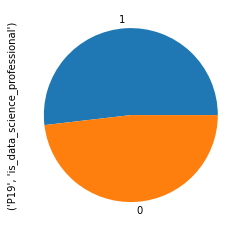

In [142]:
# Do people consider themselves as a Data science professional ?
df["('P19', 'is_data_science_professional')"].value_counts().plot(kind="pie")

Almost half doesn't consider themselves as DS professional. Let's see if they use DS tools

In [143]:
# Dataframe with only people who don't consider themselves DS professionals
noDS= df[(df["('P19', 'is_data_science_professional')"])== 0]

In [144]:
aux1 = round(noDS.filter(regex = 'P20').sum().sort_values(ascending = False))
aux1 #Models (They don't use any)

('P20', 'linear_regression')             0
('P20', 'hmms')                          0
('P20', 'joint analysis')                0
('P20', 'longitudinal_data_analysis')    0
('P20', 'survival_analysis')             0
('P20', 'cluster_analysis')              0
('P20', 'gradient_boosted_machines')     0
('P20', 'nlp')                           0
('P20', 'markov_chains')                 0
('P20', 'gans')                          0
('P20', 'rnns')                          0
('P20', 'logistic_regression')           0
('P20', 'cnns')                          0
('P20', 'svms')                          0
('P20', 'ensemble')                      0
('P20', 'bayesian_inference')            0
('P20', 'neural_networks')               0
('P20', 'random_forest')                 0
('P20', 'decision_tree')                 0
('P20', 'glms')                          0
('P20', 'no_listed_methods')             0
dtype: int64

In [145]:
aux2 = round(noDS.filter(regex = 'P23').sum().sort_values(ascending = False))
aux2 # Data info

('P23', 'sql')       0
('P23', 'nosql')     0
('P23', 'images')    0
('P23', 'nlp')       0
('P23', 'videos')    0
('P23', 'sheets')    0
('P23', 'other')     0
dtype: int64

In [146]:
aux3= round(noDS.filter(regex = 'P24').sum().sort_values(ascending = False))
aux3

('P24', 'sql')          0
('P24', 'nosql')        0
('P24', 'imagens')      0
('P24', 'nlp')          0
('P24', 'vídeos')       0
('P24', 'planilhas')    0
('P24', 'other')        0
dtype: int64

In [147]:
aux4 = round(noDS.filter(regex = 'P26').sum().sort_values(ascending = False))
aux4

('P26', 'mysql')              0
('P26', 'oracle')             0
('P26', 'hbase')              0
('P26', 'google_bigtable')    0
('P26', 'neo4j')              0
('P26', 'redis')              0
('P26', 'vertica')            0
('P26', 'firebase')           0
('P26', 'sybase')             0
('P26', 'sqlite')             0
('P26', 'ms_access')          0
('P26', 'db2')                0
('P26', 'elaticsearch')       0
('P26', 'postgresql')         0
('P26', 's3')                 0
('P26', 'datomic')            0
('P26', 'mariadb')            0
('P26', 'mongodb')            0
('P26', 'cassandra')          0
('P26', 'coachdb')            0
('P26', 'dynamodb')           0
('P26', 'aurora')             0
('P26', 'sql_server')         0
('P26', 'other')              0
dtype: int64

In [148]:
aux5 = round(noDS.filter(regex = 'P27').sum().sort_values(ascending = False))
aux5 # BI tools

('P27', 'microsoft_powerbi')               0
('P27', 'qlik_view_qlik_sense')            0
('P27', 'tableau')                         0
('P27', 'metabase')                        0
('P27', 'superset')                        0
('P27', 'redash')                          0
('P27', 'microstrategy')                   0
('P27', 'ibm_analytics_cognos')            0
('P27', 'sap_business_objects')            0
('P27', 'oracle_business_intelligence')    0
('P27', 'birst')                           0
('P27', 'looker')                          0
('P27', 'google_data_studio')              0
('P27', 'only_excel_gsheets')              0
('P27', 'no_bi_tool_at_work')              0
('P27', 'other')                           0
dtype: int64

Considering those who don't consider themselves don't use any of the DS tools they really aren't DS professionals and shouldn't be considered

In [149]:
noDS= df[(df["('P19', 'is_data_science_professional')"])== 0].index

In [150]:
# Dataset with only people who really work on Data science field
real_DS= df.drop(noDS)

<AxesSubplot:>

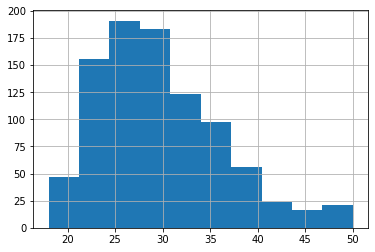

In [151]:
# How's the age distribution?
real_DS["('P1', 'age')"].hist()

Mostly between 20yo and 40yo

<AxesSubplot:ylabel="('P2', 'gender')">

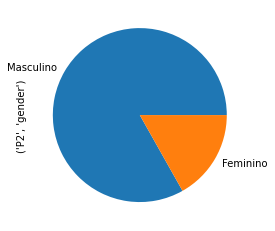

In [152]:
# How's the gender separation?
real_DS["('P2', 'gender')"].value_counts().plot(kind= 'pie')

Mostly men working on DS field

<AxesSubplot:ylabel="('P3', 'living_in_brasil')">

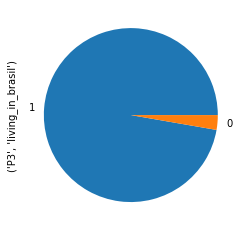

In [153]:
# Mostly live in brasil ?
real_DS["('P3', 'living_in_brasil')"].value_counts().plot(kind="pie")

Most people live in Brasil (1= yes)

In [154]:
#Where in Brasil people usually live?
real_DS["('P5', 'living_state')"].value_counts()

São Paulo (SP)            351
Minas Gerais (MG)         162
Rio de Janeiro (RJ)        86
Paraná (PR)                44
Rio Grande do Sul (RS)     42
Santa Catarina (SC)        36
Espírito Santo (ES)        10
Name: ('P5', 'living_state'), dtype: int64

In [155]:
real_DS["('D1', 'living_macroregion')"].value_counts()

Região Sudeste    609
Região Sul        122
Name: ('D1', 'living_macroregion'), dtype: int64

The region just get people from some parts of Brasil so location isn't much certain or people move to work

In [156]:
real_DS["('D2', 'origin_macroregion')"].value_counts()

Região Sudeste         92
Região Nordeste        38
Região Sul             22
Região Centro-Oeste    17
Região Norte           11
Name: ('D2', 'origin_macroregion'), dtype: int64

As all Brasilians regions are considered then most jobs are found in Sudeste and Sul, making people from other regions move to find jobs. So it's easier to get a job if you already live in those places

In [157]:
real_DS["('P6', 'born_or_graduated')"].value_counts()

1.0    709
0.0    181
Name: ('P6', 'born_or_graduated'), dtype: int64

But analysing the data mostly people already lived in those regions, probably moved to study before getting a job

In [158]:
real_DS["('P8', 'degreee_level')"].value_counts()

Graduação/Bacharelado         286
Pós-graduação                 259
Estudante de Graduação        162
Mestrado                      150
Doutorado ou Phd               41
Não tenho graduação formal     17
Name: ('P8', 'degreee_level'), dtype: int64

In [159]:
# Graduação/Bacharelado == Estudante de Graduação (Join)
real_DS.loc[real_DS["('P8', 'degreee_level')"]== "Estudante de Graduação", "('P8', 'degreee_level')"] = "Graduação/Bacharelado"

Most positions are taken by Graduation students (graduated or studing)

In [160]:
real_DS["('P10', 'job_situation')"].value_counts()

Empregado (CTL)                                  566
Empreendedor ou Empregado (CNPJ)                 124
Estagiário                                        60
Desempregado, buscando recolocação                37
Trabalho na área Acadêmica/Pesquisador            35
Servidor Público                                  30
Somente Estudante (graduação)                     24
Somente Estudante (pós-graduação)                 22
Freelancer                                        12
Prefiro não dizer                                  3
Desempregado e não estou buscando recolocação      2
Name: ('P10', 'job_situation'), dtype: int64

In [161]:
#Treatment to have less categories
real_DS.loc[real_DS["('P10', 'job_situation')"]== "Somente Estudante (graduação)", "('P10', 'job_situation')"] = "Estudante"
real_DS.loc[real_DS["('P10', 'job_situation')"]== "Somente Estudante (pós-graduação)", "('P10', 'job_situation')"] = "Estudante"
real_DS.loc[real_DS["('P10', 'job_situation')"]== "Desempregado, buscando recolocação", "('P10', 'job_situation')"] = "Desempregado"
real_DS.loc[real_DS["('P10', 'job_situation')"]== "Desempregado e não estou buscando recolocação", "('P10', 'job_situation')"] = "Desempregado"
real_DS.loc[real_DS["('P10', 'job_situation')"]== "Prefiro não dizer", "('P10', 'job_situation')"] = "Desempregado"

Most positions are from CLT

In [162]:
real_DS["('P12', 'workers_number')"].value_counts()

Acima de 3000     213
de 101 a 500      187
de 11 a 50        111
de 501 a 1000      79
de 1001 a 3000     75
de 51 a 100        65
de 1 a 5           33
de 6 a 10          32
Name: ('P12', 'workers_number'), dtype: int64

Most people work on big or medium companies

<AxesSubplot:ylabel="('P13', 'manager')">

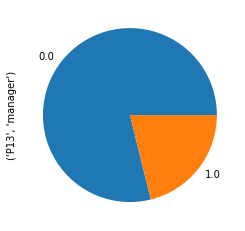

In [163]:
real_DS["('P13', 'manager')"].value_counts().plot(kind='pie')

Most positions aren't as manager

In [164]:
real_DS.loc[(real_DS["('P13', 'manager')"]== 1)]["('P16', 'salary_range')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     39
de R$ 12.001/mês a R$ 16.000/mês    29
de R$ 6.001/mês a R$ 8.000/mês      26
de R$ 4.001/mês a R$ 6.000/mês      26
de R$ 16.001/mês a R$ 20.000/mês    21
de R$ 3.001/mês a R$ 4.000/mês       8
de R$ 1.001/mês a R$ 2.000/mês       6
de R$ 2.001/mês a R$ 3000/mês        5
de R$ 20.001/mês a R$ 25.000/mês     5
Acima de R$ 25.001/mês               3
Name: ('P16', 'salary_range'), dtype: int64

In [165]:
real_DS.loc[(real_DS["('P13', 'manager')"]== 0)]["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      145
de R$ 6.001/mês a R$ 8.000/mês      104
de R$ 3.001/mês a R$ 4.000/mês       98
de R$ 8.001/mês a R$ 12.000/mês      96
de R$ 1.001/mês a R$ 2.000/mês       62
de R$ 2.001/mês a R$ 3000/mês        61
de R$ 12.001/mês a R$ 16.000/mês     27
Menos de R$ 1.000/mês                15
de R$ 16.001/mês a R$ 20.000/mês      8
de R$ 20.001/mês a R$ 25.000/mês      6
Acima de R$ 25.001/mês                5
Name: ('P16', 'salary_range'), dtype: int64

Managers positions in general gets higher salaries

In [166]:
real_DS["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      171
de R$ 8.001/mês a R$ 12.000/mês     135
de R$ 6.001/mês a R$ 8.000/mês      130
de R$ 3.001/mês a R$ 4.000/mês      106
de R$ 1.001/mês a R$ 2.000/mês       68
de R$ 2.001/mês a R$ 3000/mês        66
de R$ 12.001/mês a R$ 16.000/mês     56
de R$ 16.001/mês a R$ 20.000/mês     29
Menos de R$ 1.000/mês                15
de R$ 20.001/mês a R$ 25.000/mês     11
Acima de R$ 25.001/mês                8
Name: ('P16', 'salary_range'), dtype: int64

In [167]:
#Do I need a lot of experience to work ?
real_DS["('P17', 'time_experience_data_science')"].value_counts()

de 1 a 2 anos                             217
Menos de 1 ano                            201
de 2 a 3 anos                             162
de 4 a 5 anos                             125
de 6 a 10 anos                            100
Mais de 10 anos                            89
Não tenho experiência na área de dados     21
Name: ('P17', 'time_experience_data_science'), dtype: int64

In [168]:
real_DS["('P18', 'time_experience_before')"].value_counts()

Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados    249
Menos de 1 ano                                                                                             182
de 1 a 2 anos                                                                                              123
de 6 a 10 anos                                                                                             101
de 4 a 5 anos                                                                                               93
de 2 a 3 anos                                                                                               84
Mais de 10 anos                                                                                             83
Name: ('P18', 'time_experience_before'), dtype: int64

We don't need much experience to work, mostly people have no experience or less than 1 year of experience, but more experience pays better ?

In [169]:
real_DS.loc[(real_DS["('P17', 'time_experience_data_science')"]== "de 6 a 10 anos")]["('P16', 'salary_range')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     23
de R$ 4.001/mês a R$ 6.000/mês      22
de R$ 12.001/mês a R$ 16.000/mês    18
de R$ 6.001/mês a R$ 8.000/mês      12
de R$ 16.001/mês a R$ 20.000/mês    10
Acima de R$ 25.001/mês               4
de R$ 2.001/mês a R$ 3000/mês        3
de R$ 3.001/mês a R$ 4.000/mês       2
Menos de R$ 1.000/mês                1
Name: ('P16', 'salary_range'), dtype: int64

The higher salaries goes for the more experienced people

In [170]:
# Which models are used the most ?
aux11 = round(real_DS.filter(regex = 'P20').sum().sort_values(ascending = False))
aux11 # R: Linear Regression, C: Decision tree and Logistic regression, Cluster

('P20', 'linear_regression')             524
('P20', 'decision_tree')                 441
('P20', 'logistic_regression')           406
('P20', 'cluster_analysis')              368
('P20', 'random_forest')                 359
('P20', 'neural_networks')               267
('P20', 'nlp')                           252
('P20', 'bayesian_inference')            224
('P20', 'no_listed_methods')             192
('P20', 'svms')                          180
('P20', 'gradient_boosted_machines')     177
('P20', 'ensemble')                      169
('P20', 'glms')                          134
('P20', 'cnns')                          101
('P20', 'longitudinal_data_analysis')    101
('P20', 'rnns')                           98
('P20', 'markov_chains')                  79
('P20', 'joint analysis')                 79
('P20', 'survival_analysis')              72
('P20', 'gans')                           24
('P20', 'hmms')                           18
dtype: int64

In [171]:
# Which programming languages are used the most ?
aux12 = round(real_DS.filter(regex = 'P21').sum().sort_values(ascending = False))
aux12 # Python & SQL

('P21', 'python')                 784
('P21', 'sql_')                   714
('P21', 'r')                      318
('P21', 'java')                    89
('P21', 'visual_basic_vba')        84
('P21', 'c_c++_c#')                65
('P21', 'scala')                   62
('P21', 'sas_stata')               61
('P21', 'php')                     48
('P21', 'dotnet')                  35
('P21', 'matlab')                  29
('P21', 'julia')                   14
('P21', 'no_listed_languages')      8
dtype: int64

In [172]:
# Which data app are used the most ?
aux13 = round(real_DS.filter(regex = 'P23').sum().sort_values(ascending = False))
aux13 # SQL & Excel

('P23', 'sql')       834
('P23', 'sheets')    758
('P23', 'nosql')     377
('P23', 'nlp')       330
('P23', 'images')    160
('P23', 'videos')     36
('P23', 'other')      35
dtype: int64

In [173]:
# Which data app are used the most ?
aux14 = round(real_DS.filter(regex = 'P24').sum().sort_values(ascending = False))
aux14

('P24', 'sql')          681
('P24', 'planilhas')    384
('P24', 'nosql')        136
('P24', 'nlp')           84
('P24', 'imagens')       22
('P24', 'other')         10
('P24', 'vídeos')         5
dtype: int64

In [174]:
# P23 and P24 brings the same info
real_DS.drop(columns= ["('P24', 'sql')", "('P24', 'planilhas')", "('P24', 'nosql')","('P24', 'nlp')", "('P24', 'imagens')", 
                       "('P24', 'other')", "('P24', 'vídeos')", "('P19', 'is_data_science_professional')",
                      "('D2', 'origin_macroregion')", "('P5', 'living_state')"], inplace= True)

In [175]:
# Which cloud are used the most ?
aux15 = round(real_DS.filter(regex = 'P25').sum().sort_values(ascending = False))
aux15 #AWS for cloud

('P25', 'aws')                   412
('P25', 'gcp')                   225
('P25', 'azure')                 191
('P25', 'cloud_própria')         163
('P25', 'on_premise_servers')    152
('P25', 'other')                  69
('P25', 'ibm')                    44
dtype: int64

In [176]:
# Which data app are used the most ?
aux16 = round(real_DS.filter(regex = 'P26').sum().sort_values(ascending = False))
aux16

('P26', 'mysql')              366
('P26', 'postgresql')         345
('P26', 'sql_server')         334
('P26', 'oracle')             221
('P26', 'mongodb')            207
('P26', 's3')                 189
('P26', 'elaticsearch')       115
('P26', 'sqlite')             102
('P26', 'other')               94
('P26', 'mariadb')             64
('P26', 'redis')               44
('P26', 'dynamodb')            41
('P26', 'firebase')            40
('P26', 'db2')                 39
('P26', 'google_bigtable')     36
('P26', 'ms_access')           34
('P26', 'hbase')               33
('P26', 'cassandra')           27
('P26', 'aurora')              23
('P26', 'neo4j')               21
('P26', 'sybase')              18
('P26', 'coachdb')              5
('P26', 'vertica')              5
('P26', 'datomic')              3
dtype: int64

In [177]:
# Which BI are used the most ?
aux17 = round(real_DS.filter(regex = 'P27').sum().sort_values(ascending = False))
aux17 #Power BI & Tableau

('P27', 'microsoft_powerbi')               393
('P27', 'tableau')                         209
('P27', 'no_bi_tool_at_work')              179
('P27', 'metabase')                        144
('P27', 'google_data_studio')              129
('P27', 'only_excel_gsheets')              105
('P27', 'qlik_view_qlik_sense')             95
('P27', 'other')                            83
('P27', 'microstrategy')                    27
('P27', 'redash')                           26
('P27', 'ibm_analytics_cognos')             20
('P27', 'superset')                         17
('P27', 'sap_business_objects')             17
('P27', 'looker')                           15
('P27', 'oracle_business_intelligence')     10
('P27', 'birst')                             2
dtype: int64

In [178]:
# Which ETL are used the most ?
aux18 = round(real_DS.filter(regex = 'P28').sum().sort_values(ascending = False))
aux18 #SQL

('P28', 'sql_&_stored_procedures')                 293
('P28', 'other')                                   205
('P28', 'pentaho')                                 170
('P28', 'apache_airflow')                          156
('P28', 'siss_sql_server_integration_services')    126
('P28', 'aws_glue')                                104
('P28', 'talend')                                   42
('P28', 'ibm_data_stage')                           39
('P28', 'alteryx')                                  37
('P28', 'oracle_data_integrator')                   37
('P28', 'sap_bw_etl')                               24
('P28', 'luigi')                                    15
dtype: int64

In [179]:
# Which data warehouse are used the most ?
aux19 = round(real_DS.filter(regex = 'P30').sum().sort_values(ascending = False))
aux19 

('P30', 'postgres_mysql')     107
('P30', 'aws_redshift')        92
('P30', 'microsoft_azure')     85
('P30', 'oracle')              82
('P30', 'do_not_know')         60
('P30', 'google_bigquery')     54
('P30', 'other')               36
('P30', 'teradata')            28
('P30', 'ibm')                 20
('P30', 'snowflake')           14
dtype: int64

In [180]:
# Which updates platforms are used the most ?
aux20 = round(real_DS.filter(regex = 'P33').sum().sort_values(ascending = False))
aux20 #Get info about DS world in Youtube

('P33', 'youtube_channels')         526
('P33', 'abroad_blogs')             474
('P33', 'meetups_and_events')       459
('P33', 'other_brasilian_blogs')    340
('P33', 'abroad_podcasts')          284
('P33', 'telegram_groups')          253
('P33', 'whatsapp_groups')          227
('P33', 'twitter')                  187
('P33', 'other')                     94
('P33', 'other_slack_channels')      56
('P33', 'only_data_hackers')         49
dtype: int64

In [181]:
# Which learning platforms are used the most ?
aux21 = round(real_DS.filter(regex = 'P34').sum().sort_values(ascending = False))
aux21 #Learning in Udemy & Coursera

('P34', 'udemy')             605
('P34', 'coursera')          439
('P34', 'udacity')           339
('P34', 'data_camp')         255
('P34', 'edx')               191
('P34', 'kaggle_learn')      191
('P34', 'height')            145
('P34', 'other')             115
('P34', 'online_courses')     51
('P34', 'data_quest')         42
dtype: int64

In [182]:
real_DS["('D3', 'anonymized_degree_area')"].value_counts()

Computação / Engenharia de Software / Sistemas de Informação    501
Outras Engenharias                                              143
Economia/ Administração / Contabilidade / Finanças               90
Estatística/ Matemática / Matemática Computacional               84
Outras                                                           35
Química / Física                                                 18
Marketing / Publicidade / Comunicação / Jornalismo               17
Ciências Sociais                                                 10
Name: ('D3', 'anonymized_degree_area'), dtype: int64

DS professionals comes mostly from Computer science and Engineerings

In [183]:
real_DS["('D4', 'anonymized_market_sector')"].value_counts()

Tecnologia/Fábrica de Software    242
Finanças ou Bancos                111
Outras                             93
Varejo                             47
Setor Público                      46
Educação                           40
Área da Saúde                      39
Marketing                          38
Internet/Ecommerce                 37
Indústria (Manufatura)             34
Telecomunicação                    18
Entretenimento ou Esportes         13
Agronegócios                       10
Seguros ou Previdência              7
Setor Alimentício                   7
Setor Automotivo                    7
Setor Farmaceutico                  4
Name: ('D4', 'anonymized_market_sector'), dtype: int64

In Brasil the market sector with more DS professionals are tecnology and banks

In [184]:
real_DS["('D6', 'anonymized_role')"].value_counts()

Data Scientist/Cientista de Dados          162
Data Analyst/Analista de Dados             131
Data Engineer/Engenheiro de Dados           93
Business Intelligence/Analista de BI        75
Desenvolvedor ou Engenheiro de Software     59
Outras                                      33
Business Analyst/Analista de Negócios       25
Analista de Inteligência de Mercado         16
Engenheiro de Machine Learning              15
Estatístico                                  9
Engenheiro                                   8
DBA/Administrador de Banco de Dados          5
Economista                                   4
Analista de Marketing                        3
Name: ('D6', 'anonymized_role'), dtype: int64

Info that seems important:
- Age
- Gender
- Company size
- Region in Brasil
- Knowledge level
- Manager position
- Experience

Get a ML model for feature decision

**Treatment**

In [185]:
# Treating missing data
real_DS.isnull().sum()[real_DS.isnull().sum() != 0 ].sort_values(ascending = False)

('D6', 'anonymized_role')             277
('D1', 'living_macroregion')          184
('D4', 'anonymized_market_sector')    122
('P12', 'workers_number')             120
('P13', 'manager')                    120
('P16', 'salary_range')               120
('P6', 'born_or_graduated')            25
('D3', 'anonymized_degree_area')       17
dtype: int64

In [186]:
# Fillna: If people didn't answer it's probably not a manager position
real_DS["('P13', 'manager')"]= real_DS["('P13', 'manager')"].fillna(real_DS["('P13', 'manager')"].mode().iloc[0])
real_DS["('P6', 'born_or_graduated')"]= real_DS["('P6', 'born_or_graduated')"].fillna(real_DS["('P6', 'born_or_graduated')"].mode().iloc[0])

In [187]:
# Get less categories for degree area
real_DS.loc[real_DS["('D3', 'anonymized_degree_area')"]== "Ciências Sociais", "('D3', 'anonymized_degree_area')"] = "Outras"
real_DS.loc[real_DS["('D3', 'anonymized_degree_area')"]== "Marketing / Publicidade / Comunicação / Jornalismo", "('D3', 'anonymized_degree_area')"] = "Outras"
real_DS.loc[real_DS["('D3', 'anonymized_degree_area')"]== "Química / Física", "('D3', 'anonymized_degree_area')"] = "Outras"

In [188]:
# Fillna with mode
real_DS["('D3', 'anonymized_degree_area')"]= real_DS["('D3', 'anonymized_degree_area')"].fillna(real_DS["('D3', 'anonymized_degree_area')"].mode().iloc[0])

In [189]:
# Change salaries categories for numbers
real_DS.loc[real_DS["('P16', 'salary_range')"]== "Menos de R$ 1.000/mês", "('P16', 'salary_range')"] = 1000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 1.001/mês a R$ 2.000/mês", "('P16', 'salary_range')"] = 1500
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 2.001/mês a R$ 3000/mês", "('P16', 'salary_range')"] = 2500
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 3.001/mês a R$ 4.000/mês", "('P16', 'salary_range')"] = 3500
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 4.001/mês a R$ 6.000/mês", "('P16', 'salary_range')"] = 5000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 6.001/mês a R$ 8.000/mês", "('P16', 'salary_range')"] = 7000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 8.001/mês a R$ 12.000/mês", "('P16', 'salary_range')"] = 10000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 12.001/mês a R$ 16.000/mês", "('P16', 'salary_range')"] = 14000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 16.001/mês a R$ 20.000/mês", "('P16', 'salary_range')"] = 18000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "de R$ 20.001/mês a R$ 25.000/mês", "('P16', 'salary_range')"] = 23000
real_DS.loc[real_DS["('P16', 'salary_range')"]== "Acima de R$ 25.001/mês", "('P16', 'salary_range')"] = 25000

In [190]:
# Changing categories for role
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Analista de Marketing", "('D6', 'anonymized_role')"] = "Outras"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Estatístico", "('D6', 'anonymized_role')"] = "Outras"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Engenheiro", "('D6', 'anonymized_role')"] = "Outras"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Economista", "('D6', 'anonymized_role')"] = "Outras"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "DBA/Administrador de Banco de Dados", "('D6', 'anonymized_role')"] = "Data Engineer/Engenheiro de Dados"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Business Analyst/Analista de Negócios", "('D6', 'anonymized_role')"] = "Business Intelligence/Analista de BI"
real_DS.loc[real_DS["('D6', 'anonymized_role')"]== "Analista de Inteligência de Mercado", "('D6', 'anonymized_role')"] = "Business Intelligence/Analista de BI"

In [191]:
# Fill with mean for simplifications
real_DS["('P16', 'salary_range')"]= real_DS["('P16', 'salary_range')"].fillna(real_DS["('P16', 'salary_range')"].mean())

In [192]:
# Fill with mode for simplifications
real_DS["('D6', 'anonymized_role')"]= real_DS["('D6', 'anonymized_role')"].fillna(real_DS["('D6', 'anonymized_role')"].mode().iloc[0])

In [193]:
# Fill with mode for simplifications
real_DS["('D1', 'living_macroregion')"]= real_DS["('D1', 'living_macroregion')"].fillna(real_DS["('D1', 'living_macroregion')"].mode().iloc[0])

In [194]:
# Changing categories for market sector
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Varejo", "('D4', 'anonymized_market_sector')"] = "Vendas"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Marketing", "('D4', 'anonymized_market_sector')"] = "Vendas"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Internet/Ecommerce", "('D4', 'anonymized_market_sector')"] = "Vendas"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Seguros ou Previdência", "('D4', 'anonymized_market_sector')"] = "Outras"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Setor Alimentício", "('D4', 'anonymized_market_sector')"] = "Outras"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Setor Automotivo", "('D4', 'anonymized_market_sector')"] = "Outras"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Setor Farmaceutico", "('D4', 'anonymized_market_sector')"] = "Área da Saúde"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Telecomunicação", "('D4', 'anonymized_market_sector')"] = "Tecnologia/Fábrica de Software"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Entretenimento ou Esportes", "('D4', 'anonymized_market_sector')"] = "Outras"
real_DS.loc[real_DS["('D4', 'anonymized_market_sector')"]== "Agronegócios", "('D4', 'anonymized_market_sector')"] = "Indústria (Manufatura)"

In [195]:
# Fill with mode for simplifications
real_DS["('D4', 'anonymized_market_sector')"]= real_DS["('D4', 'anonymized_market_sector')"].fillna(real_DS["('D4', 'anonymized_market_sector')"].mode().iloc[0])

In [196]:
# Changing categories for companie size
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 6 a 10", "('P12', 'workers_number')"] = "Pequena"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 1 a 5", "('P12', 'workers_number')"] = "Pequena"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "Acima de 3000", "('P12', 'workers_number')"] = "Grande"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 51 a 100", "('P12', 'workers_number')"] = "Pequena"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 1001 a 3000", "('P12', 'workers_number')"] = "Grande"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 501 a 1000", "('P12', 'workers_number')"] = "Média"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 11 a 50", "('P12', 'workers_number')"] = "Pequena"
real_DS.loc[real_DS["('P12', 'workers_number')"]== "de 101 a 500", "('P12', 'workers_number')"] = "Média"

In [197]:
# Fill with mode for simplifications
real_DS["('P12', 'workers_number')"]= real_DS["('P12', 'workers_number')"].fillna(real_DS["('P12', 'workers_number')"].mode().iloc[0])

In [198]:
real_DS.loc[real_DS["('P17', 'time_experience_data_science')"]== "Não tenho experiência na área de dados", "('P17', 'time_experience_data_science')"] = "Menos de 1 ano"

In [199]:
DS_dummy= pd.get_dummies(real_DS, columns=["('P2', 'gender')", "('P8', 'degreee_level')", "('P10', 'job_situation')",
                                "('P12', 'workers_number')", "('P17', 'time_experience_data_science')", 
                                 "('D1', 'living_macroregion')", "('D3', 'anonymized_degree_area')", 
                                 "('D4', 'anonymized_market_sector')", "('D6', 'anonymized_role')"], drop_first= True)

**Feature Selection**

In [200]:
X= DS_dummy.drop(columns= ["('P16', 'salary_range')", "('P18', 'time_experience_before')", "('P34', 'other')"])
y= DS_dummy["('P16', 'salary_range')"]

In [201]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y)

In [203]:
sc= MinMaxScaler().fit(Xtrain)
Xtrain_normalized= sc.transform(Xtrain)
Xtest_normalized= sc.transform(Xtrain)

In [207]:
rf= RandomForestRegressor(n_estimators=200, min_samples_split=100, min_samples_leaf=50).fit(Xtrain, ytrain)

In [208]:
rf.feature_importances_

array([6.57821057e-01, 0.00000000e+00, 0.00000000e+00, 7.11844937e-02,
       1.05729504e-02, 1.46249926e-02, 0.00000000e+00, 1.35393878e-02,
       1.96366201e-02, 0.00000000e+00, 1.34812782e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.22202087e-02,
       6.21967732e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.38707644e-04, 0.00000000e+00, 4.29890827e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.54109663e-03,
       0.00000000e+00, 2.08033234e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.84828725e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.95890869e-03, 0.00000000e+00, 0.00000000e+00,
       7.48292173e-04, 0.00000000e+00, 9.77253058e-04, 0.00000000e+00,
      

<BarContainer object of 171 artists>

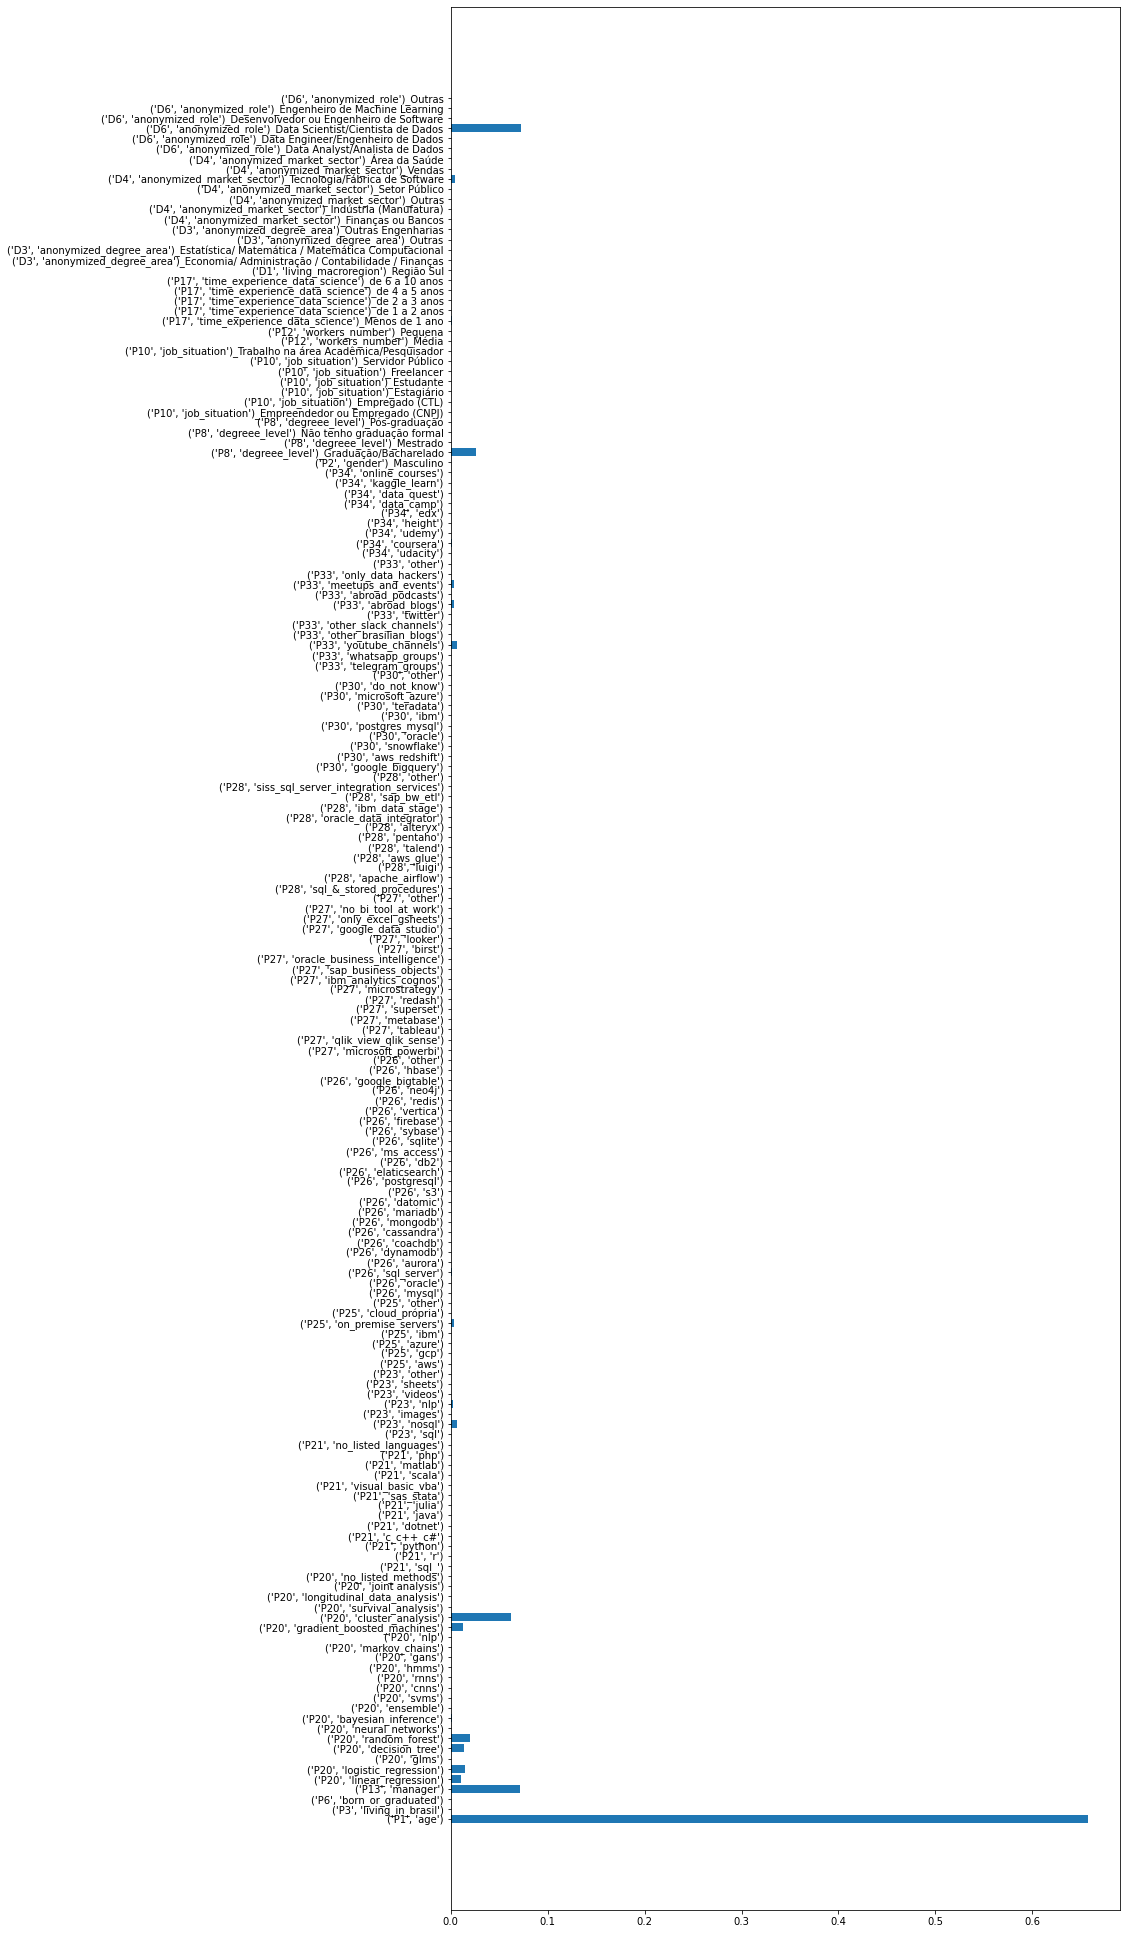

In [215]:
plt.rcParams.update({'figure.figsize': (12, 35)})
plt.barh(X.columns, rf.feature_importances_)

Most important info to get good DS positions:
- Age
- Manager position
- Models you can use (Linear Regression, Logistic Regression, Decision Tree, Random Forest, Gradient boosted machines, Cluster)
- NoSQL
- NLP
- On premise servers
- Knowledge level (Graduation)
- Company market sector (Tecnology)
- Job role (Data scientist)